In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

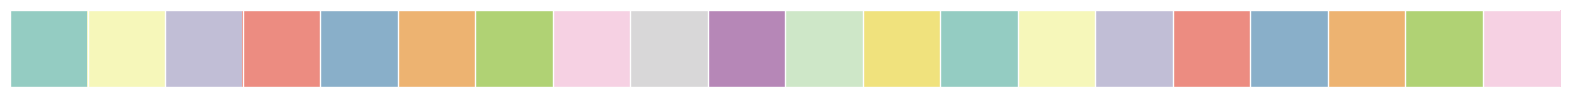

In [2]:
sns.palplot(sns.color_palette("Set3", n_colors=20, desat=.8))
sns.set_palette("Set3", n_colors=20, desat=.8)

In [3]:
pythonQuestions = pd.read_csv("./pythonquestions/Questions.csv", encoding = "latin1")

In [4]:
pythonQuestions["CreationDate"] = pythonQuestions["CreationDate"].apply(lambda x: pd.to_datetime(x))
pythonQuestions["Title"] = pythonQuestions["Title"].apply(lambda x: str(x))
pythonQuestions["Body"] = pythonQuestions["Body"].apply(lambda x: str(x))

In [5]:
pythonQuestions.set_index("Id", inplace=True)
pythonQuestions.head(5)

,OwnerUserId,CreationDate,Score,Title,Body
Id,,,,,
469,147.0,2008-08-02 15:11:16,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
502,147.0,2008-08-02 17:01:58,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
535,154.0,2008-08-02 18:43:54,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
594,116.0,2008-08-03 01:15:08,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
683,199.0,2008-08-03 13:19:16,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [6]:
pythonQuestions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607282 entries, 469 to 40143365
Data columns (total 5 columns):
OwnerUserId     601070 non-null float64
CreationDate    607282 non-null datetime64[ns]
Score           607282 non-null int64
Title           607282 non-null object
Body            607282 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 27.8+ MB


In [7]:
pythonQuestions = pythonQuestions[(pythonQuestions["CreationDate"] > "2008-08-14 23:59:59") & (pythonQuestions["CreationDate"] < "2016-10-13 00:00:00")]
pythonQuestions.head(5)

,OwnerUserId,CreationDate,Score,Title,Body
Id,,,,,
12591,207.0,2008-08-15 18:42:20,6,Using an XML catalog with Python's lxml?,"<p>Is there a way, when I parse an XML documen..."
12592,742.0,2008-08-15 18:43:17,28,Can you check that an exception is thrown with...,<p>Is it possible to write a doctest unit test...
13396,1266.0,2008-08-16 22:28:39,5,Replacement for for... if array iteration,"<p>I love list comprehensions in Python, becau..."
13454,NaN,2008-08-17 01:23:50,9,Python version of PHP's stripslashes,<p>I wrote a piece of code to convert PHP's st...
13791,1370.0,2008-08-17 18:20:21,10,Python Regular Expressions to implement string...,<p>I'm trying to implement string unescaping w...


In [8]:
def plot_Score_Title_Body_Length(df):
    QuestionsTitleLength = df["Title"].apply(lambda x: len(x))
    QuestionsBodyLength = df["Body"].apply(lambda x: len(x))
    fig, ax = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(11.7, 4)
    sns.distplot(df[df.Score <= 50].Score, ax=ax[0], color="#074484")
    sns.distplot(QuestionsTitleLength, ax=ax[1], color="#074484")
    sns.distplot(QuestionsBodyLength[QuestionsBodyLength < 10000], ax=ax[2], color="#074484")

/Users/apple/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


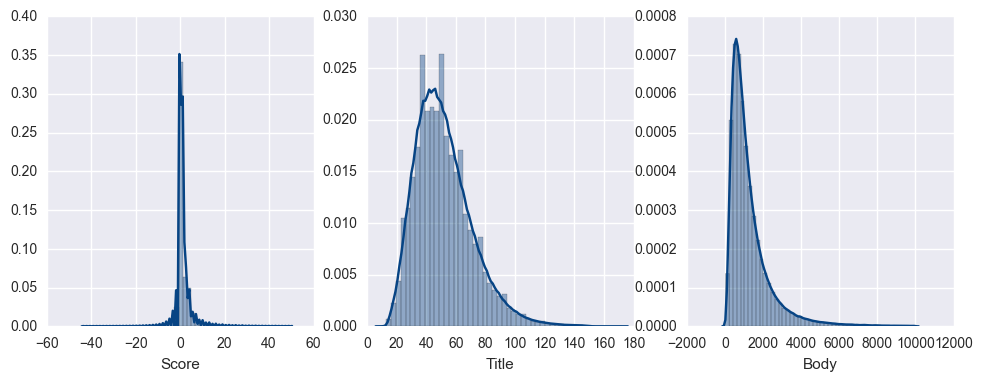

In [9]:
plot_Score_Title_Body_Length(pythonQuestions)

In [10]:
pythonQuestions[pythonQuestions["Body"].apply(lambda x:len(x) > 3000)].sample(n=5)

,OwnerUserId,CreationDate,Score,Title,Body
Id,,,,,
39625563,6705888.0,2016-09-21 20:01:27,0,django: single modelform for a foreign key object,<p>Sorry if the title is not clear enough. Bas...
20938546,3050852.0,2014-01-05 20:10:06,0,Python tkinter scrollbar/graph scale slowing d...,<p>I have been toying around with putting a sc...
39500612,3633522.0,2016-09-14 22:29:47,1,Any way to install Pandas with PyPy?,<p>I'm trying to run some code using <strong>P...
17184341,2351696.0,2013-06-19 06:32:23,1,How to store username after first time faceboo...,<p>I am creating a website having option to lo...
31353423,4844191.0,2015-07-11 04:30:44,1,Tor and Python3 using SocksiPy,<p>I copy pasted a code from another post whic...


In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pythonQuestions.loc[28352943, "Body"], 'html.parser')

In [12]:
print(soup.prettify())

<p>
 I have the following script for scraping a webform:
</p>
<pre><code>#!/usr/bin/env python

"""
Python script for searching firms on http://www.adviserinfo.sec.gov/IAPD/Content/Search/iapd_Search.aspx

Assumes that the input Excel file is in the same directory as this script.
"""

import os
import re
import sys
import django
import mechanize

from bs4 import BeautifulSoup
from xlrd import open_workbook

XLSX_FILE = 'Legal Names.xlsx'
IAPD_URL = 'http://www.adviserinfo.sec.gov/IAPD/Content/Search/iapd_Search.aspx'

#------------------------------------------------------------------------------------------
sys.path.append(os.path.realpath(os.path.join(os.path.dirname(__file__), 'scraper/')))
sys.path.append(os.path.realpath(os.path.join(os.path.dirname(__file__), 'scraper/scraper/')))

os.environ['DJANGO_SETTINGS_MODULE'] = 'settings'
django.setup()

from django.core.exceptions import ObjectDoesNotExist
from custom_scraper.models import *
#--------------------------------------------

In [13]:
qnsWithCode = pythonQuestions[pythonQuestions["Body"].apply(lambda text: '<code>' in text)]
qnsWithCode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519287 entries, 12592 to 40043149
Data columns (total 5 columns):
OwnerUserId     514294 non-null float64
CreationDate    519287 non-null datetime64[ns]
Score           519287 non-null int64
Title           519287 non-null object
Body            519287 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.8+ MB


/Users/apple/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


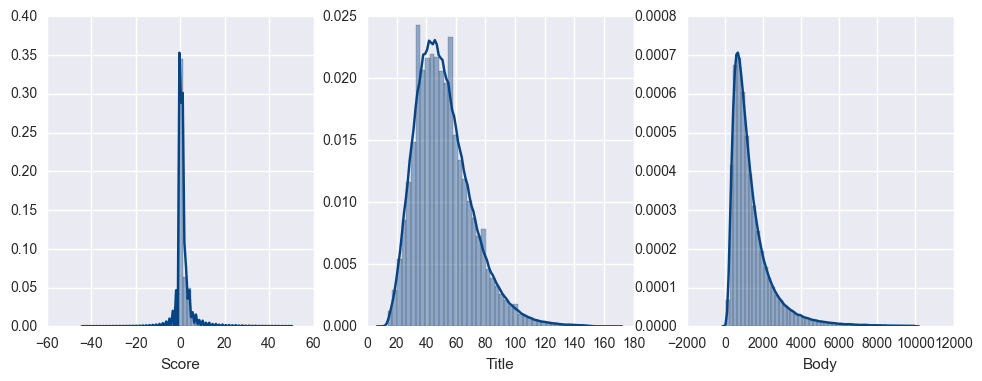

In [14]:
plot_Score_Title_Body_Length(qnsWithCode)

In [15]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_df=0.8, max_features=200000,
                       min_df=0.1, stop_words='english', ngram_range=(1,3), use_idf=True,
                       analyzer='word')

In [16]:
def returnCodeBody(text):
    pattern = re.compile(r'<[^>]+>|\n|\r')
    soup = BeautifulSoup(text, 'html.parser')
    return pattern.sub(" ", str(soup.code))

def samplingCleanText(df, numOfSamples):
    testCode = df.sample(n=numOfSamples)
    testCode["Code Body"] = testCode["Body"].apply(lambda x: returnCodeBody(x))
    testCode["Body Exc. Code"] = testCode["Body"].str.replace(r'<code>[^<]+</code>'," ").str.replace(r"<[^>]+>|\n|\r", " ")
    testCode.drop("Body", inplace=True, axis=1)
    return testCode

In [17]:
sample = samplingCleanText(qnsWithCode,10000)
sample.head()

,OwnerUserId,CreationDate,Score,Title,Code Body,Body Exc. Code
Id,,,,,,
29675185,4663351.0,2015-04-16 12:47:44,2,How to read only a specific range of lines out...,"with open('A.csv', 'rt') as f: reader = ...",How can I only read from line 5000 to 6000 in...
23065247,680441.0,2014-04-14 16:25:21,1,Flask app.add_url_rule in decorator error,@app.route,I have a bunch of decorators in my Flask rout...
38233761,3538220.0,2016-07-06 21:05:22,4,Random access over all pair-wise combinations ...,"large = [1, 60, 17, ...]",Background: I have a list of 44906 items...
5343877,664950.0,2011-03-17 18:58:33,5,How to turn the result (in python) of itertool...,"list(itertools.permutations(""0123456789""))","In Python, I am using , and I am receiving (..."
2347042,99834.0,2010-02-27 10:49:54,8,How to run a python script without specifying ...,do.py,Let's say that we have a Python script and ...


In [18]:
sample_Text = sample[["Title", "Code Body", "Body Exc. Code"]]
sample_Text.head(5)

,Title,Code Body,Body Exc. Code
Id,,,
29675185,How to read only a specific range of lines out...,"with open('A.csv', 'rt') as f: reader = ...",How can I only read from line 5000 to 6000 in...
23065247,Flask app.add_url_rule in decorator error,@app.route,I have a bunch of decorators in my Flask rout...
38233761,Random access over all pair-wise combinations ...,"large = [1, 60, 17, ...]",Background: I have a list of 44906 items...
5343877,How to turn the result (in python) of itertool...,"list(itertools.permutations(""0123456789""))","In Python, I am using , and I am receiving (..."
2347042,How to run a python script without specifying ...,do.py,Let's say that we have a Python script and ...


In [19]:
dtm = vect.fit_transform(sample_Text["Body Exc. Code"])
dtm.shape

(10000, 32)

In [20]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm_df.head(5)

,code,data,does,don,error,example,file,following,function,help,...,thanks,tried,trying,use,using,ve,want,way,work,works
0,0.359607,0.000000,0.000000,0.0,0.0,0.526209,0.477876,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.509935,0.0,0.0,0.000000,0.215265,0.218383,0.729811,0.0,...,0.0,0.000000,0.199423,0.000000,0.000000,0.000000,0.00000,0.207942,0.000000,0.0
2,0.064696,0.098582,0.101830,0.0,0.0,0.094669,0.000000,0.000000,0.194317,0.0,...,0.0,0.094337,0.079647,0.084280,0.000000,0.100637,0.00000,0.332197,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.298427,0.000000,0.00000,0.355424,0.000000,0.0
4,0.000000,0.000000,0.158854,0.0,0.0,0.000000,0.670587,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.262951,0.000000,0.000000,0.11909,0.259110,0.304472,0.0


In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [22]:
dtm.toarray()

array([[ 0.35960731,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.50993512, ...,  0.2079421 ,
         0.        ,  0.        ],
       [ 0.06469622,  0.09858201,  0.10183044, ...,  0.33219655,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.34729885,
         0.        ,  0.4402863 ]])

In [23]:
tsne = TSNE(n_components=2, random_state=0)
if dtm_df.shape[1] <= 10000:
    dtm_tsne = tsne.fit_transform(dtm.toarray())
else:
    n_components_pca = 10000
    dtm_tsne = tsne.fit_transform(PCA(n_components=n_components_pca, random_state=0).fit_transform(dtm.toarray()))

In [24]:
dtm_tsne_df = pd.DataFrame(dtm_tsne, index=sample_Text.index, columns=['x', 'y'])
dtm_tsne_df.head(5)

,x,y
Id,,
29675185,-2.933148,6.502072
23065247,-7.451023,-0.785078
38233761,-7.367126,3.840216
5343877,-6.611985,4.188915
2347042,4.658248,6.087481


In [25]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from wordcloud import WordCloud

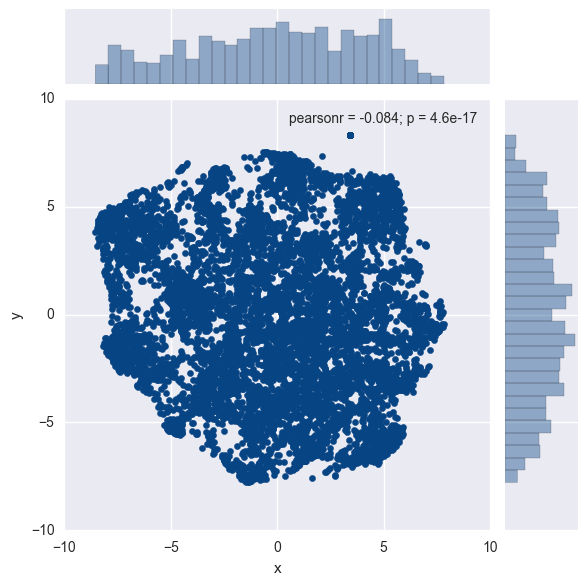

In [26]:
sns.jointplot(dtm_tsne_df["x"], dtm_tsne_df["y"], color="#074484")

In [27]:
import warnings
def get_clusters(X, index, n_cluster, batch_size=200, series_name='clusters'):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = MiniBatchKMeans(n_clusters=n_cluster, batch_size=batch_size, random_state=0).fit(X) 
        return pd.Series(model.labels_, index=index, name=series_name)

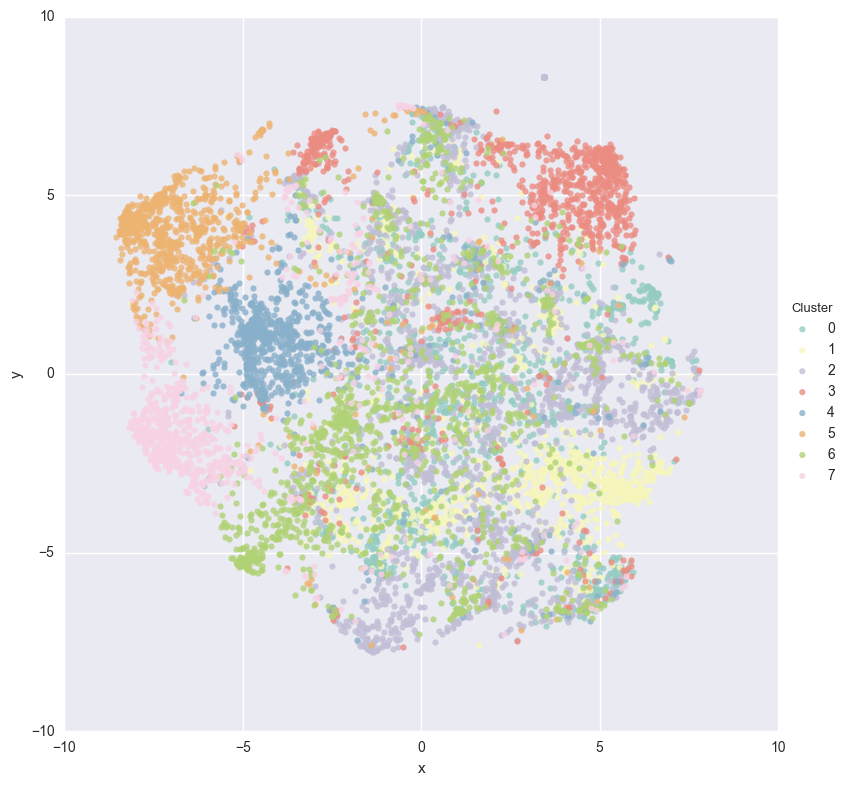

In [28]:
clusters = get_clusters(dtm, sample_Text.index, 8)
dtm_tsne_df["Cluster"] = clusters
sns.lmplot("x", "y", hue="Cluster", data=dtm_tsne_df, fit_reg=False, aspect=1.0, size=8)

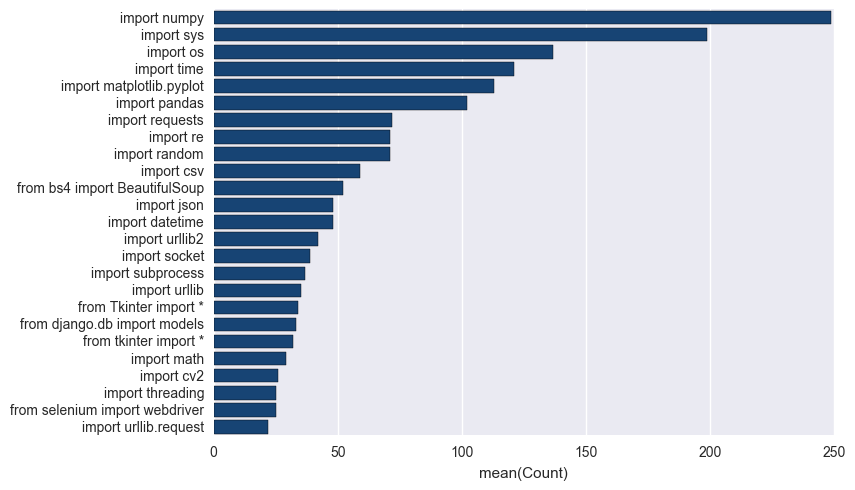

In [44]:
def find_top_n_import(df, n):
    pattern = re.compile(r'(from\s([^\s]+)\simport\s([^\s]+)|import\s([^\s]+))')
    sample_text_import = df["Code Body"].str.extractall(pattern)[0]
    sample_text_import_count = sample_text_import.value_counts()
    sample_text_import_count_df = pd.DataFrame(sample_text_import_count, index=sample_text_import_count.index, columns=["Count"])
    sns.barplot(y=sample_text_import_count_df.iloc[0:n].index,
            x=sample_text_import_count_df.iloc[0:n].Count, 
            data=sample_text_import_count_df.iloc[0:n],
            color="#074484")
find_top_n_import(sample_Text, 25)